<a href="https://colab.research.google.com/github/rencdr/house_price_prediction/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
data = pd.read_csv("housing.csv")

In [61]:
data.dropna(inplace=True)

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [63]:
from sklearn.model_selection import train_test_split
X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [65]:
train_data = X_train.join(y_train)

In [66]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
898,-121.96,37.53,18.0,2375.0,652.0,1252.0,586.0,2.6198,<1H OCEAN,235900.0
1364,-122.14,38.03,42.0,118.0,34.0,54.0,30.0,2.5795,NEAR BAY,225000.0
7341,-118.14,33.97,29.0,1846.0,530.0,2576.0,528.0,2.6300,<1H OCEAN,156000.0
19995,-119.35,36.19,6.0,958.0,226.0,734.0,230.0,1.0349,INLAND,67800.0
16687,-120.59,35.12,27.0,3055.0,677.0,1407.0,610.0,2.1702,<1H OCEAN,179700.0
...,...,...,...,...,...,...,...,...,...,...
2594,-124.06,40.88,12.0,2087.0,424.0,1603.0,438.0,2.5667,NEAR OCEAN,139500.0
18316,-122.13,37.44,42.0,2390.0,462.0,1146.0,468.0,6.3111,NEAR BAY,397400.0
15016,-117.03,32.77,19.0,4819.0,1492.0,2572.0,1336.0,2.3393,<1H OCEAN,118200.0
10907,-117.85,33.75,27.0,2311.0,632.0,2936.0,609.0,2.5651,<1H OCEAN,171400.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

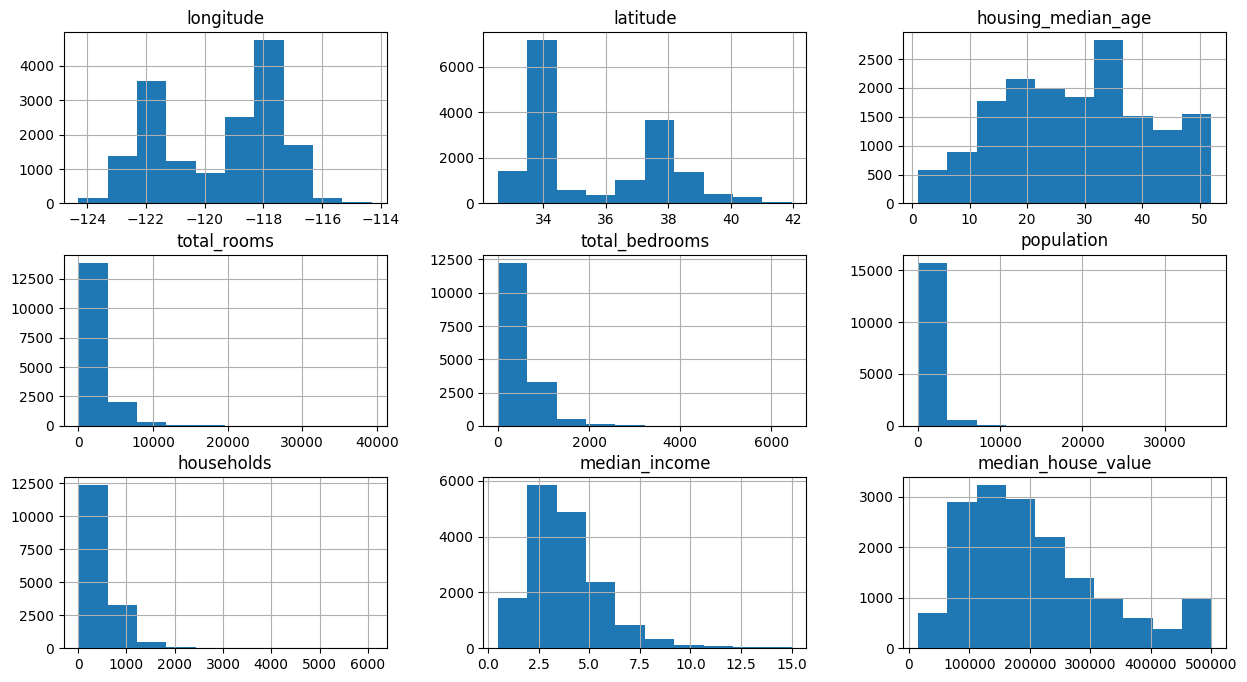

In [67]:
train_data.hist(figsize=(15, 8))

<ipython-input-68-af35f9592c23>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")


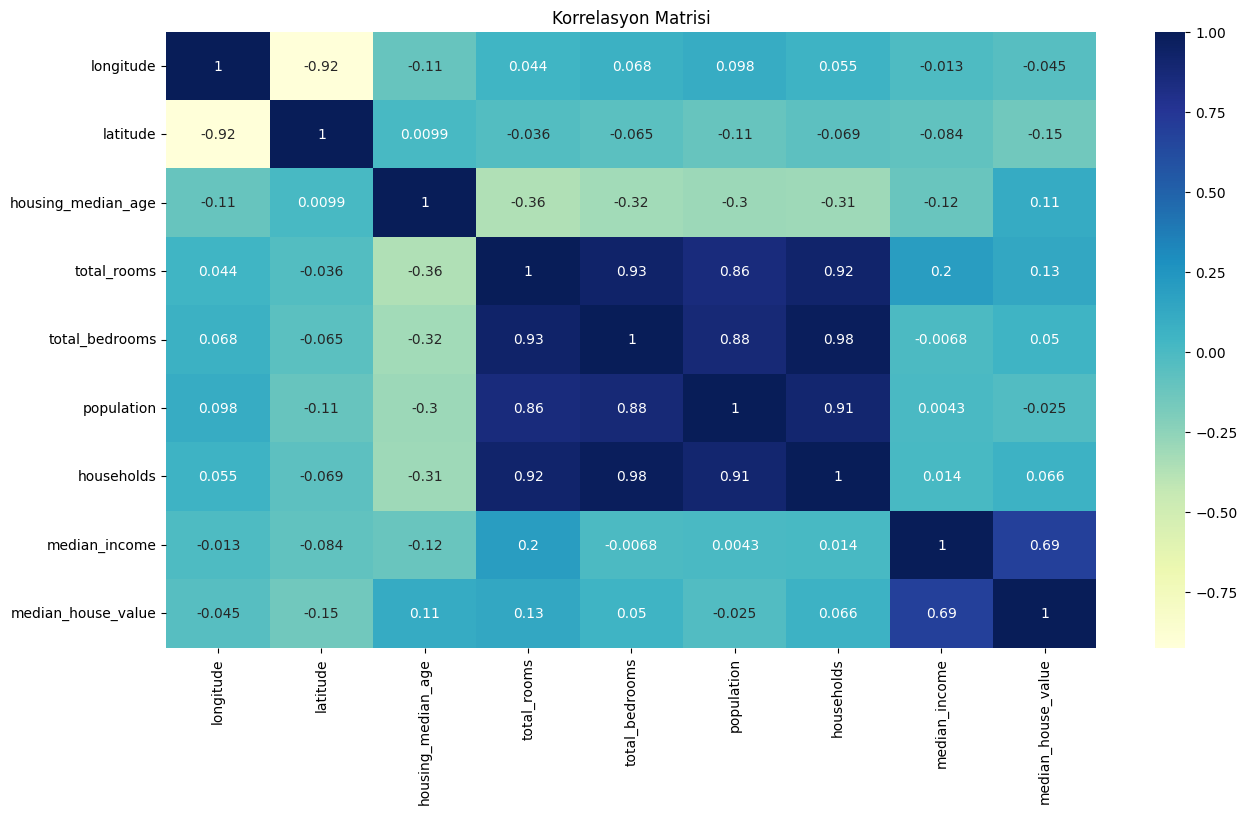

In [68]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")
plt.title("Korrelasyon Matrisi")
plt.show()


In [69]:
train_data['total_rooms'] =  np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] =  np.log(train_data['total_bedrooms'] + 1)
train_data['population'] =  np.log(train_data['population'] + 1)
train_data['households'] =  np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

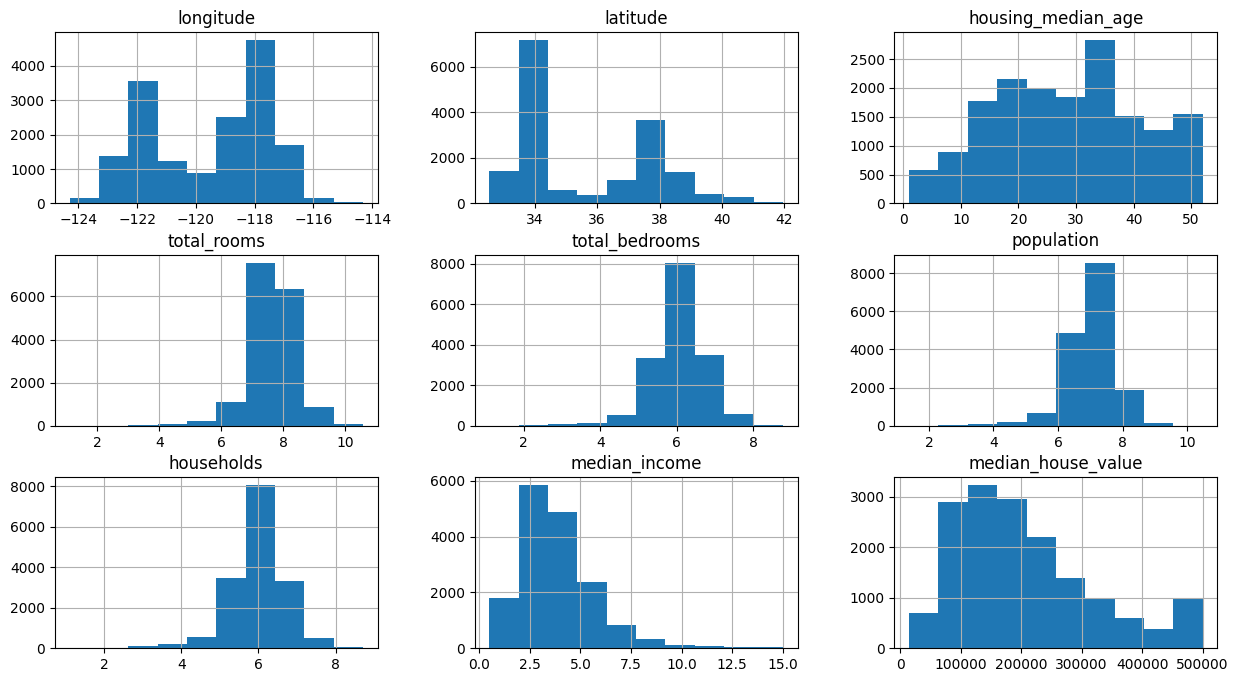

In [70]:
train_data.hist(figsize=(15, 8))

In [71]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

<Axes: >

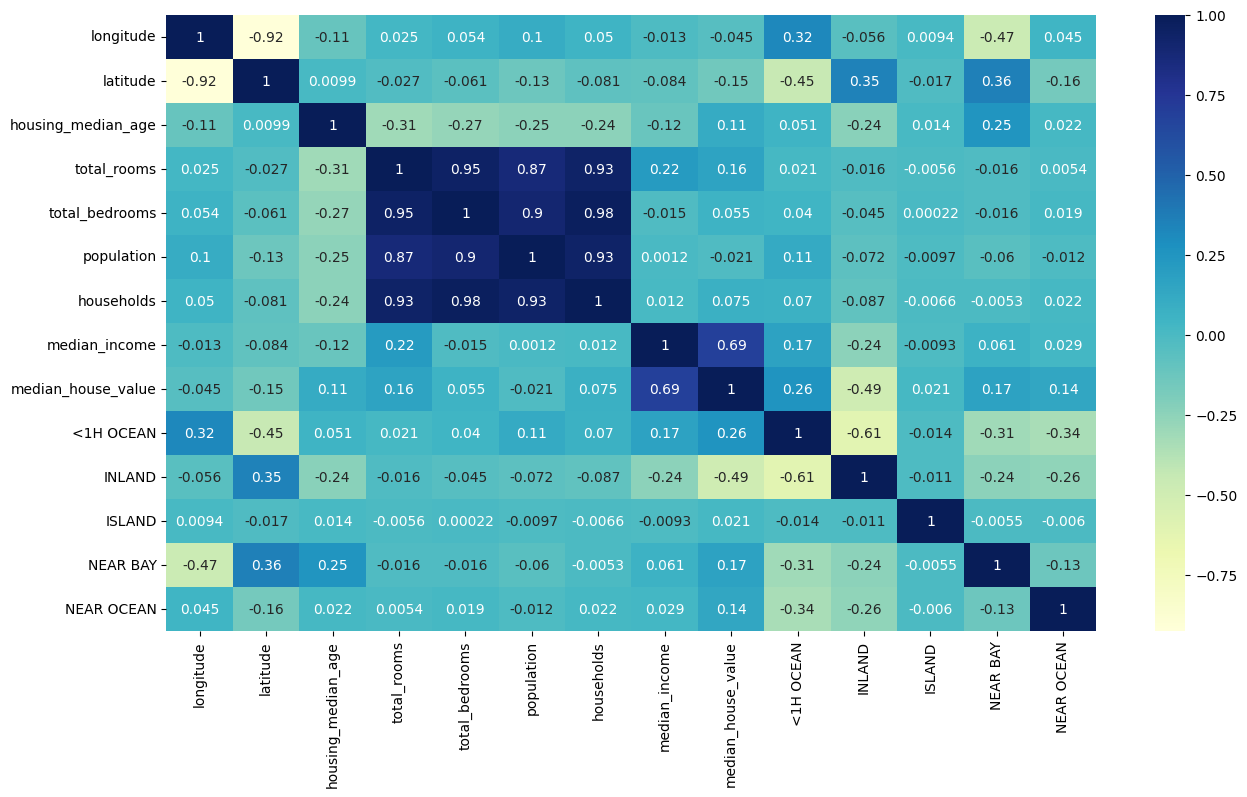

In [72]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")


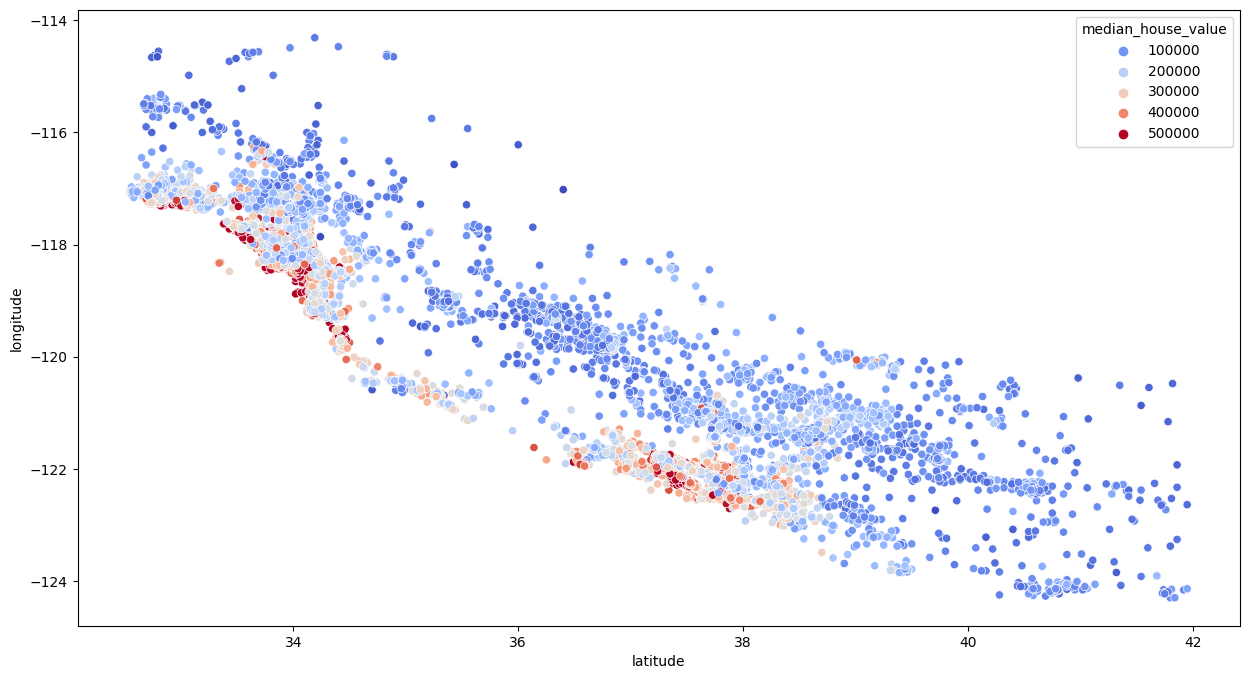

In [73]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")
plt.show()


In [74]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

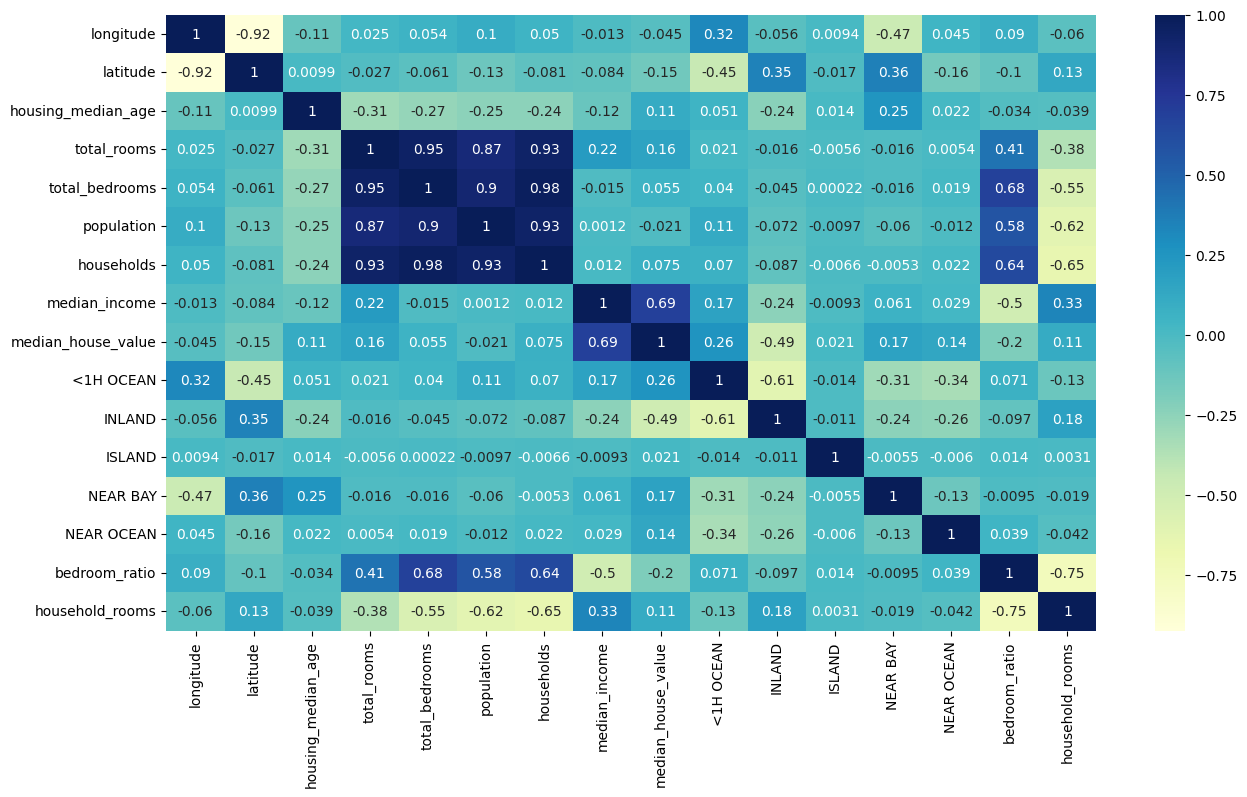

In [75]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")



In [76]:
from sklearn.linear_model import LinearRegression

X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [77]:
test_data = X_test.join(y_test)
test_data['total_rooms'] =  np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] =  np.log(test_data['total_bedrooms'] + 1)
test_data['population'] =  np.log(test_data['population'] + 1)
test_data['households'] =  np.log(test_data['households'] + 1)
test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)
test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']


In [78]:
reg.score(X_test, y_test)

0.6694750014553794

In [81]:
from sklearn.ensemble import RandomForestRegressor

forest=RandomForestRegressor()

forest.fit(X_train, y_train)

RandomForestRegressor()

In [82]:
forest.score(X_test, y_test)

0.8170651871240417

In [86]:
y_true = y_test
y_pred = forest.predict(X_test)


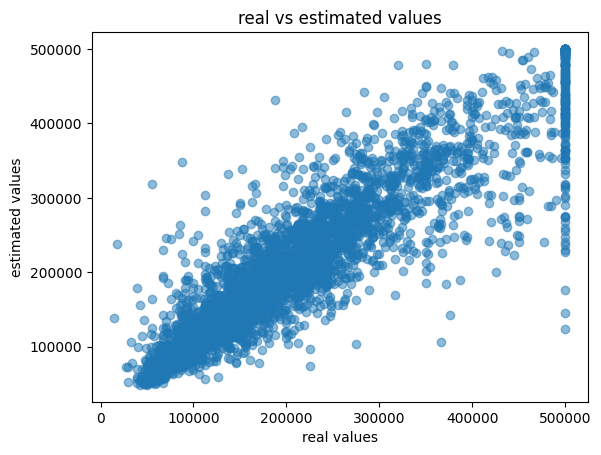

In [87]:

plt.scatter(y_true, y_pred, alpha=0.5)
plt.xlabel('real values')
plt.ylabel('estimated values')
plt.title('real vs estimated values')
plt.show()